# Explore the dataset, review descriptive statistics, and identify outliers in water–cement ratio

In [67]:
# Explore the dataset
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = 'concrete_mix_classification.csv'
df = pd.read_csv(path)
df.head(), df.shape


(   id  cement_content_kg_m3  water_cement_ratio  aggregate_size_mm  \
 0   1                 314.9               0.484               25.9   
 1   2                 439.8               0.385               21.7   
 2   3                 397.0               0.641               24.6   
 3   4                 289.6               0.518               22.7   
 4   5                 345.3               0.455               23.9   
 
    fine_agg_pct  curing_time_days  curing_temp_C  slump_mm  air_content_pct  \
 0          33.3                56           15.1        83              3.1   
 1          37.6                28           17.7       103              3.6   
 2          35.3                21           11.9        99              5.6   
 3          42.0                21           21.4        58              5.8   
 4          50.5                21           23.1        87              5.1   
 
   admixture_type cement_type mixing_method  high_strength_class  \
 0    plasticizer     

In [68]:
# Review descriptive statistics
cols = ['cement_content_kg_m3', 'water_cement_ratio', 'aggregate_size_mm',
        'fine_agg_pct', 'curing_time_days', 'curing_temp_C', 'slump_mm',
        'air_content_pct','high_strength_class', 'is_outlier_wcr']
print(df.describe())

              id  cement_content_kg_m3  water_cement_ratio  aggregate_size_mm  \
count  700.00000            700.000000          700.000000         700.000000   
mean   350.50000            379.816857            0.485769          20.150714   
std    202.21688             58.656646            0.145165           5.814590   
min      1.00000            250.000000            0.063000           5.000000   
25%    175.75000            339.450000            0.411000          16.200000   
50%    350.50000            379.750000            0.476000          20.300000   
75%    525.25000            420.900000            0.542250          24.325000   
max    700.00000            520.000000            1.474000          37.100000   

       fine_agg_pct  curing_time_days  curing_temp_C    slump_mm  \
count    700.000000         700.00000     700.000000  700.000000   
mean      38.206714          28.11000      22.273143   80.947143   
std        7.832946          14.46502       4.936874   25.183136  

water_cement_ratio: 23 outliers (IQR fences 0.21..0.74)


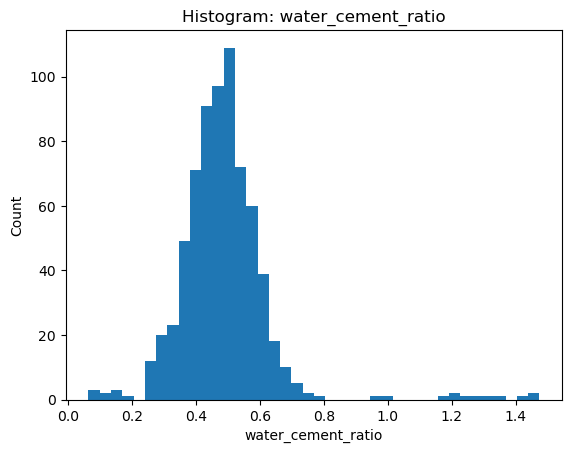

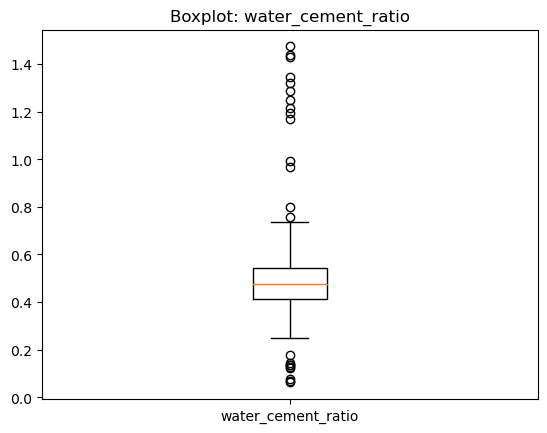

In [69]:
# Identify outliers in water–cement ratio
def iqr_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (s < lower) | (s > upper), (lower, upper)

mask, (lo, hi) = iqr_mask(df['water_cement_ratio'])
print(f'water_cement_ratio: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')


plt.figure()
plt.hist(df['water_cement_ratio'].dropna(), bins=40)
plt.title(f'Histogram: water_cement_ratio')
plt.xlabel('water_cement_ratio'); plt.ylabel('Count')
plt.show()

plt.figure()
plt.boxplot(df['water_cement_ratio'].dropna(), vert=True, labels=['water_cement_ratio'])
plt.title(f'Boxplot: water_cement_ratio')
plt.show()

# Prepare the data by separating features and target, scaling numerical values, and encoding categorical variables.

In [70]:
# Seperating Features and Target
df_target = df['high_strength_class']
df_outliers = df['is_outlier_wcr']
df_train = df.drop(['high_strength_class', 'is_outlier_wcr'], axis=1)


print(df_target.head())
print("=" * 100)
print(df_outliers.head())
print("=" * 100)
print(df_train.head())

0    0
1    1
2    0
3    0
4    0
Name: high_strength_class, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: is_outlier_wcr, dtype: int64
   id  cement_content_kg_m3  water_cement_ratio  aggregate_size_mm  \
0   1                 314.9               0.484               25.9   
1   2                 439.8               0.385               21.7   
2   3                 397.0               0.641               24.6   
3   4                 289.6               0.518               22.7   
4   5                 345.3               0.455               23.9   

   fine_agg_pct  curing_time_days  curing_temp_C  slump_mm  air_content_pct  \
0          33.3                56           15.1        83              3.1   
1          37.6                28           17.7       103              3.6   
2          35.3                21           11.9        99              5.6   
3          42.0                21           21.4        58              5.8   
4          50.5                21      

In [71]:
# Scaling numerical values
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Create scaler
std_scaler = StandardScaler()

# Determine numerical features to train
columns_to_scale = ['cement_content_kg_m3', 'water_cement_ratio', 'aggregate_size_mm',
                    'fine_agg_pct', 'curing_time_days', 'curing_temp_C', 
                   'slump_mm', 'air_content_pct']

# Perform scaling
df_scaled = std_scaler.fit_transform(df_train[columns_to_scale].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Re-add nominal categories
df_scaled["admixture_type"] = df_train["admixture_type"]
df_scaled["cement_type"] = df_train["cement_type"]
df_scaled["mixing_method"] = df_train["mixing_method"]

print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,cement_content_kg_m3,water_cement_ratio,aggregate_size_mm,fine_agg_pct,curing_time_days,curing_temp_C,slump_mm,air_content_pct,admixture_type,cement_type,mixing_method
0,-1.107518,-0.012192,0.989476,-0.626868,1.929478,-1.454012,0.081575,-1.215164,plasticizer,OPC,pan
1,1.023346,-0.694662,0.266639,-0.077512,-0.007610,-0.926986,0.876326,-0.791255,plasticizer,OPC,drum
2,0.293154,1.070109,0.765741,-0.371354,-0.491882,-2.102658,0.717376,0.904378,none,PPC,drum
3,-1.539150,0.222192,0.438743,0.484619,-0.491882,-0.176988,-0.911862,1.073942,plasticizer,OPC,drum
4,-0.588877,-0.212107,0.645268,1.570555,-0.491882,0.167606,0.240525,0.480470,none,PPC,pan


In [72]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df_scaled, columns=['admixture_type','cement_type', 'mixing_method'], drop_first=True)
df_encoded.head()

,cement_content_kg_m3,water_cement_ratio,aggregate_size_mm,fine_agg_pct,curing_time_days,curing_temp_C,slump_mm,air_content_pct,admixture_type_plasticizer,admixture_type_silica_fume,admixture_type_superplasticizer,cement_type_PPC,cement_type_Slag,mixing_method_pan
0,-1.107518,-0.012192,0.989476,-0.626868,1.929478,-1.454012,0.081575,-1.215164,True,False,False,False,False,True
1,1.023346,-0.694662,0.266639,-0.077512,-0.007610,-0.926986,0.876326,-0.791255,True,False,False,False,False,False
2,0.293154,1.070109,0.765741,-0.371354,-0.491882,-2.102658,0.717376,0.904378,False,False,False,True,False,False
3,-1.539150,0.222192,0.438743,0.484619,-0.491882,-0.176988,-0.911862,1.073942,True,False,False,False,False,False
4,-0.588877,-0.212107,0.645268,1.570555,-0.491882,0.167606,0.240525,0.480470,False,False,False,True,False,True


# Build and train a logistic regression model to predict high strength versus low strength concrete.

In [73]:
# Split data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, df_target, test_size=0.2, random_state=42)

In [74]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Interpret model coefficients to understand which mix features affect the strength class.

In [75]:
print("Feature Coefficients:")
for x in range(len(df_encoded.columns)):
    print(df_encoded.columns[x] + ":\t" + str(model.coef_[0][x]) )

Feature Coefficients:
cement_content_kg_m3:	1.795119607180324
water_cement_ratio:	-1.290085250186443
aggregate_size_mm:	-0.29811736528859323
fine_agg_pct:	0.07081755944300264
curing_time_days:	0.9385362807318653
curing_temp_C:	-0.018639038478297735
slump_mm:	0.061724599041148735
air_content_pct:	-0.4184757597534548
admixture_type_plasticizer:	0.8092321602869186
admixture_type_silica_fume:	1.6319443819486221
admixture_type_superplasticizer:	2.7171442719773817
cement_type_PPC:	-0.025874838075831363
cement_type_Slag:	1.1599429866624038
mixing_method_pan:	0.41987037836860885


# Evaluate the model using confusion matrix, classification report (precision, recall, F1), and ROC curve.

In [76]:
# Evalutate the model's accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 85.71%


In [77]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[78 12]
 [ 8 42]]


In [78]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        90
           1       0.78      0.84      0.81        50

    accuracy                           0.86       140
   macro avg       0.84      0.85      0.85       140
weighted avg       0.86      0.86      0.86       140



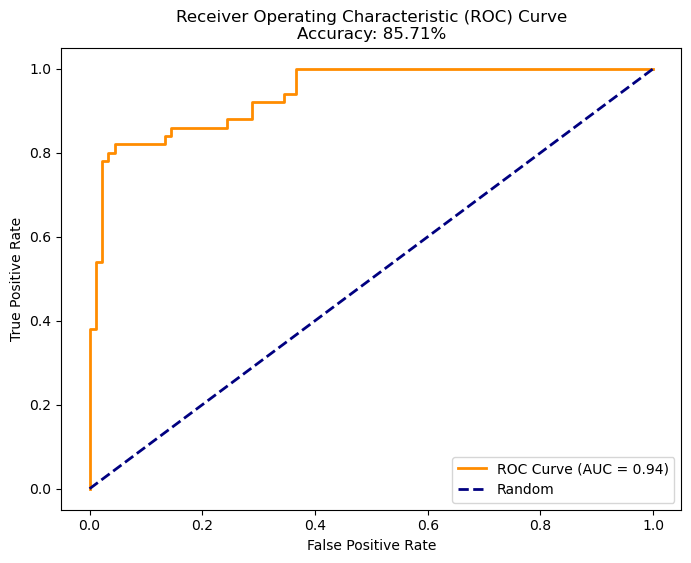

In [79]:
# Roc Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

# Compare performance before and after removing outliers to analyze their effect on model accuracy.

In [80]:
# Remove outliers
columns_with_outliers = ['cement_content_kg_m3', 'water_cement_ratio', 'aggregate_size_mm',
                    'fine_agg_pct', 'curing_time_days', 'curing_temp_C', 
                   'slump_mm', 'air_content_pct']

df_outliers_removed = df_encoded
for c in columns_with_outliers:
    mask, (lo, hi) = iqr_mask(df_outliers_removed[c])
    print(f'{c}: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')
     # Trim
    # Mask contains outliers
    # Use '~' to get mask with only non-outliers
    # Apply flipped mask to get only values which are not outliers
    df_outliers_removed = df_outliers_removed[~mask]
    


cement_content_kg_m3: 0 outliers (IQR fences -2.77..2.79)
water_cement_ratio: 23 outliers (IQR fences -1.87..1.75)
aggregate_size_mm: 1 outliers (IQR fences -2.75..2.76)
fine_agg_pct: 1 outliers (IQR fences -2.64..2.63)
curing_time_days: 0 outliers (IQR fences -3.88..3.87)
curing_temp_C: 2 outliers (IQR fences -2.67..2.68)
slump_mm: 4 outliers (IQR fences -2.80..2.76)
air_content_pct: 2 outliers (IQR fences -2.87..2.90)


In [85]:
# Split data into test and train sets
from sklearn.model_selection import train_test_split

# Filter target to remove rows which removed in trimming so indexes match
df_target_filtered = df_target.loc[df_outliers_removed.index]

X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
    df_outliers_removed, df_target_filtered, test_size=0.2, random_state=42)

In [86]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_out = LogisticRegression()
model_out.fit(X_train_out, y_train_out)

LogisticRegression()

In [87]:
print("Feature Coefficients:")
for x in range(len(df_outliers_removed.columns)):
    print(df_outliers_removed.columns[x] + ":\t" + str(model_out.coef_[0][x]) )

Feature Coefficients:
cement_content_kg_m3:	2.0543611427670494
water_cement_ratio:	-2.3582130778209507
aggregate_size_mm:	-0.1460089771236072
fine_agg_pct:	0.04191607625483044
curing_time_days:	1.0400500473851515
curing_temp_C:	0.0766608781911176
slump_mm:	0.1690702935746654
air_content_pct:	-0.5316875585380522
admixture_type_plasticizer:	0.8008814464514881
admixture_type_silica_fume:	1.845942887098385
admixture_type_superplasticizer:	2.9856119936078898
cement_type_PPC:	0.11765243446371527
cement_type_Slag:	1.1469699348598124
mixing_method_pan:	0.27152627020532216


In [88]:
# Evalutate the model's accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
y_pred_out = model_out.predict(X_test_out)
accuracy_out = accuracy_score(y_test_out, y_pred_out)
print("Accuracy: {:.2f}%".format(accuracy_out * 100))


Accuracy: 91.04%


In [89]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_out, y_pred_out))

Confusion Matrix:
 [[88  5]
 [ 7 34]]


In [90]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test_out, y_pred_out))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        93
           1       0.87      0.83      0.85        41

    accuracy                           0.91       134
   macro avg       0.90      0.89      0.89       134
weighted avg       0.91      0.91      0.91       134



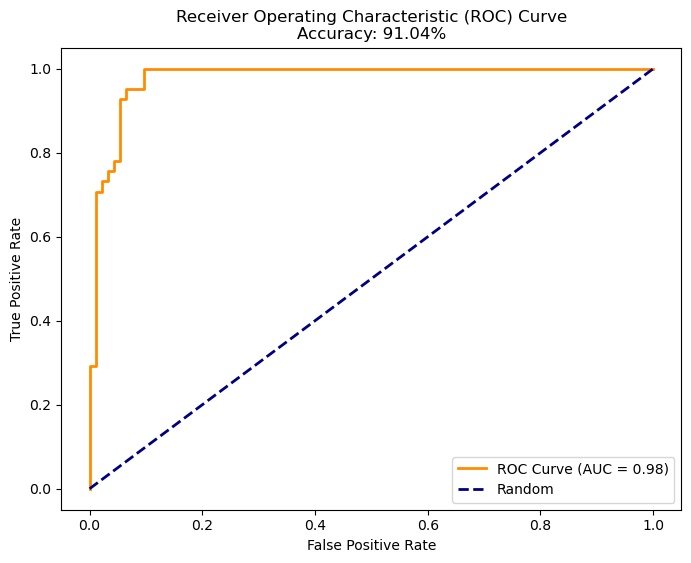

In [91]:
# Roc Curve
y_prob_out = model_out.predict_proba(X_test_out)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_out, y_prob_out)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy_out * 100))
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Overall accuracy increased by 5.33 % after trimming outliers